### Add primary imports

In [10]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import random
from sklearn.model_selection import train_test_split

### Generate random data

In [11]:
n=100
xdata_mean_A , xdata_sigma_A = 0 , 0.1 
ydata_mean_A , ydata_sigma_A = 0 , 0.4
xdata_mean_B , xdata_sigma_B = 1 , 0.2
ydata_mean_B , ydata_sigma_B = 1 , 0.2

# generate random data
Xdata_A = np.random.normal(xdata_mean_A , xdata_sigma_A , n) 
Ydata_A = np.random.normal(ydata_mean_A , xdata_sigma_A , n) 

Xdata_B = np.random.normal(xdata_mean_B , xdata_sigma_B , n)
Ydata_B = np.random.normal(ydata_mean_B , ydata_sigma_B , n)

## Insertion data into matrix
# classA_matrix
Xdata_A_matrix = np.matrix([Xdata_A])
Ydata_A_matrix = np.matrix([Ydata_A])
ClassA_matrix = np.concatenate((Xdata_A_matrix, Ydata_A_matrix))
LabelA = np.ones(n)
LabelA = np.matrix([LabelA])
ClassA_matrix = np.concatenate((ClassA_matrix ,LabelA))
ClassA_matrix = ClassA_matrix.transpose()

# classB_matrix
Xdata_B_matrix = np.matrix([Xdata_B])
Ydata_B_matrix = np.matrix([Ydata_B])
ClassB_matrix = np.concatenate((Xdata_B_matrix, Ydata_B_matrix))
LabelB = np.zeros(n)
LabelB = np.matrix([LabelB])
ClassB_matrix = np.concatenate((ClassB_matrix ,LabelB))
ClassB_matrix = ClassB_matrix.transpose()

## Combining two matrices
data = np.concatenate((ClassB_matrix, ClassA_matrix))
# mix the matrix
np.random.shuffle(data)
print(data[:10])


[[ 0.8120841   1.25591087  0.        ]
 [ 0.90659575  0.98861128  0.        ]
 [-0.02323805  0.0517712   1.        ]
 [ 0.1056848   0.02898542  1.        ]
 [ 0.85225604  1.25356229  0.        ]
 [ 0.98052091  0.95650045  0.        ]
 [-0.04396159  0.21754261  1.        ]
 [ 1.39302211  1.11120295  0.        ]
 [ 0.97782849  1.12804834  0.        ]
 [ 1.04762092  1.28696597  0.        ]]


### Scatter plot

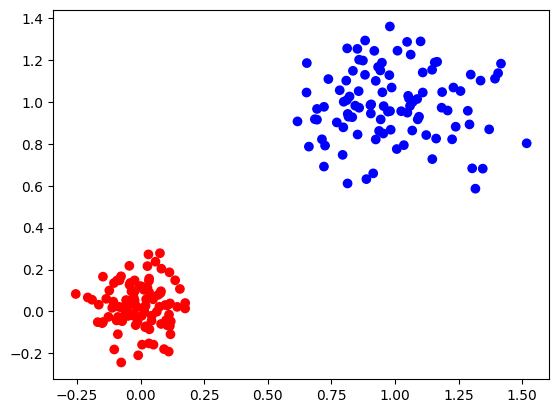

In [12]:
x = np.ravel(data[:, 0])
y = np.ravel(data[:, 1])
colors = np.ravel(data[:, 2])

plt.scatter(x, y, c=colors, cmap='bwr')

### train test split

In [13]:
feature_data = np.delete(data, 2, 1)
label_data = np.asarray(data[:,2])

feature_data_train, feature_data_test, label_data_train, label_data_test = train_test_split( feature_data, label_data, test_size=0.2, random_state=4)
print ('Train set:', feature_data_train.shape,  label_data_train.shape)
print ('Test set:', feature_data_test.shape,  label_data_test.shape)

Train set: (160, 2) (160, 1)
Test set: (40, 2) (40, 1)


### Modeling

In [ ]:
class Adaline:
    def __init__(self, lr, threshold):
        self.lr = lr
        self.threshold = threshold  
        self.w = np.zeros(feature_data.shape[1]) + 0.01
        self.bias = 0.1

    def fit(self, feature_data, label_data):
        E = 0 
        for i in range (0,50):
            E = 0
            for i in range(feature_data.shape[0]):
                net=0
                # Generate net
                for j in range (feature_data.ndim):
                    net += (self.w[j]*feature_data[i,j])
                net += self.bias
                # update w1 w2 bias
                for q in range (feature_data.shape[1]):
                    self.w[q] = self.w[q] + self.lr*(label_data[i]-net)*feature_data[i,q]
                self.bias = self.bias + self.lr*(label_data[i]-net)
                # Generate E
                E += 0.5*((label_data[i] - net)**2)     
            if (E < self.threshold): break